<h1 style = 'color: #ffc300'><b>House Price Prediction (Competition Dataset)</b> </h1>

In this notebook , i will try to make a model that can predict the price of houses based the features.
This dataset has taken from kaggle website and this represent a competition challenge from kaggle. So let's try to use my best of knowlege to solve this problem

In [193]:
## importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## setting by default graph style here
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['axes.titlecolor'] = '#003049'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = '#219ebc'

In [194]:
## Loading the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
df = pd.concat([train_data, test_data], axis=0, sort=False)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


I merged both train and test data so that when i'll do any type of preprocessing, feature engineering .. i should not do the <code>same step for both.</code> So first i will aggregated them after transforming i'll again split them into train and test data

In [195]:
## Let's see the shape of my data
df.shape

(2919, 81)

My data has <b style = 'color:#ffc300'>2919</b> rows and <b style = 'color:#ffc300'>81</b> columns which reprsent a huge featured column. So This is intresting project

In [196]:
## Let's see more information about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [197]:
## checking the stats of the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


By just looking the stats of the data we can see that many columns may contain outliers. So it means we may have to deal with outliers also.

In [198]:
## Let's calculate the missing values % in each feature
missing_data = df.isnull().sum()
# calculating the percentage of missing data
percent_missing_data = (missing_data / len(df)) * 100
## checking those columns where missing values are present
missed_features_percent = percent_missing_data[percent_missing_data > 0]
print(missed_features_percent)

## checking total featues with missing values
print(f'There are total of {len(missed_features_percent)} missing features')


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64
There are total of 35 missing features


In <b>35</b> features missing values are there

<h2 style = 'color: #ffc300; text-align:center' ><b>Data Cleaning</b></h2>

<li>First Checking for Duplicate Values</li>

In [199]:
df.duplicated().sum()

0

No duplicate values are found.

<li>Removing Gimmy column <code>Id</code>

In [200]:
df.drop('Id', axis=1, inplace=True)

<li>Let's deal with those features where null values are less than 10 %.</li>

In [201]:
## Getting all the columns where null values are less than 10 %
less_10_data = missed_features_percent[missed_features_percent < 10]
print(less_10_data)
print(f'Total features: {len(less_10_data)}')

MSZoning        0.137033
Utilities       0.068517
Exterior1st     0.034258
Exterior2nd     0.034258
MasVnrArea      0.787941
BsmtQual        2.774923
BsmtCond        2.809181
BsmtExposure    2.809181
BsmtFinType1    2.706406
BsmtFinSF1      0.034258
BsmtFinType2    2.740665
BsmtFinSF2      0.034258
BsmtUnfSF       0.034258
TotalBsmtSF     0.034258
Electrical      0.034258
BsmtFullBath    0.068517
BsmtHalfBath    0.068517
KitchenQual     0.034258
Functional      0.068517
GarageType      5.378554
GarageYrBlt     5.447071
GarageFinish    5.447071
GarageCars      0.034258
GarageArea      0.034258
GarageQual      5.447071
GarageCond      5.447071
SaleType        0.034258
dtype: float64
Total features: 27


Since These missing values are very small comparitively. So if we like we can drop them also , it won't effect that much but in my case i don't want to loose any information so i will deal with them statistically.

First i will deal with Garage related columns since if u closely have a look on then it's clear percentage of <b style = 'color: #ffc300'>missing values are same in all</b>. <p style = 'color: #2a9d8f'>It means they are related and relation is because of <code>GarageYrBuilt</code>.</p><br>
So First let's see those rows where GarageYrBuilt is null

In [202]:
## checking those values where GarageBuiltYear is null
garage_null = df[df['GarageYrBlt'].isnull()][['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

garage_null

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1453,NaN,NaN,NaN,NaN,NaN
1454,NaN,NaN,NaN,NaN,NaN


In [203]:
## Confirming if all values are null in this case
garage_null.isnull().sum()

GarageYrBlt     159
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64

clearly we can see all the values are null.<br>
<b style = 'color: #ffc300'>Problem Statement:</b> How should we deal with this values? how should we fill it?<br>
<b style = 'color: #ffc300'>Thinking For solution:</b> do because of GarageYrBuilt all the values are null? If because of Year feature the missing values are there, so how can we replace them?<br>
Answer is very simple, Fortunately if u check the description file then it's clear in <code>GarageType</code> <b style = 'color: #2a9d8f'>wherever is a <b>NaN</b> it means there is No Garage and that's why GarageYearBuilt and other fetures related to it is NaN.</b><br>
So We just have to replace No Garage in Every Feature

In [204]:
## Importing Transform class from sklearn to clean the data
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Creating the transformer
garage_trf = ColumnTransformer([
    ('garage_yr_impute', SimpleImputer(strategy='constant', fill_value=0), ['GarageYrBlt']),
    ('other_garage_impute', SimpleImputer(strategy='constant', fill_value='No Garage'), ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])
], remainder='passthrough')

## Transforming the data
garage_transform_val = garage_trf.fit_transform(garage_null)

## Creating the dataframe for further process
garage_transform_val_df = pd.DataFrame(garage_transform_val, columns=['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

## Let's see the transformed data
garage_transform_val_df

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
0,0.0,No Garage,No Garage,No Garage,No Garage
1,0.0,No Garage,No Garage,No Garage,No Garage
2,0.0,No Garage,No Garage,No Garage,No Garage
3,0.0,No Garage,No Garage,No Garage,No Garage
4,0.0,No Garage,No Garage,No Garage,No Garage
...,...,...,...,...,...
154,0.0,No Garage,No Garage,No Garage,No Garage
155,0.0,No Garage,No Garage,No Garage,No Garage
156,0.0,No Garage,No Garage,No Garage,No Garage
157,0.0,No Garage,No Garage,No Garage,No Garage


Here where ever year built of garage is NaN i replaced it with 0 since it's a numeric feature.<br>
Now let's fit these value into actual dataframe

In [205]:
## fitting the values back to the original data
df.loc[df['GarageYrBlt'].isnull(), ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = garage_transform_val_df.values

## checking the data again
df['GarageYrBlt'].isnull().sum()

0

So we have succesfully dealt with Garage Columns. Now Let's see others

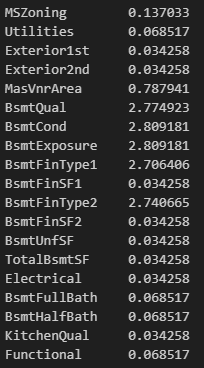


<b style = 'color: #ffc300'>Catch a pattern: </b> <b>Exterior1st, Exterior2nd, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Electrical, KitchenQual, SaleType</b> their missing percentage are same. So is it like they are also related??
But that much of using brain for only replacing less than 4 or 5 data is not worthy so let's just delete those column where missed values are less than 4

In [206]:
df.isnull().sum()[(df.isnull().sum() < 3) & (df.isnull().sum() > 0)]

Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [207]:
## deleting the rows where Exterior1st is null

# getting the name of columns where null values are present and less than 3
columns = df.isnull().sum()[(df.isnull().sum() < 3) & (df.isnull().sum() > 0)].index.tolist()
df.dropna(subset = columns, inplace=True)

In [208]:
## again checking how many null features are there in the data less than 3
df.isnull().sum()[(df.isnull().sum() < 3) & (df.isnull().sum() > 0)]


MSZoning    2
dtype: int64

Now only MS Zoning is left so first what values it have

In [209]:
## checking values in MsZoning with frequency
df['MSZoning'].value_counts()

MSZoning
RL         2259
RM          457
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

We can simply replace Null values with mode (RL) for MSZoning column

In [210]:
## replacing the value
df['MSZoning'].fillna('RL', inplace=True)

In [211]:
## checking the null data again
df.isnull().sum()[(df.isnull().sum() > 0)]

LotFrontage      485
Alley           2711
MasVnrType      1756
MasVnrArea        23
BsmtQual          77
BsmtCond          78
BsmtExposure      78
BsmtFinType1      75
BsmtFinType2      76
FireplaceQu     1413
PoolQC          2898
Fence           2339
MiscFeature     2804
SalePrice       1449
dtype: int64

Now Interesting columns are there again to deal null value since there are lot of values we can't delete them. Let's use our data cleaning expertise here

<b>First let's deal with Numerical columns</b>

In [212]:
## Getting the null present columns
null_values_columns = df.isnull().sum()[(df.isnull().sum() > 0)].index.to_list()

# Getting the numerical columns (Null presented)
null_numerical_col = df[null_values_columns].select_dtypes(exclude = 'object').columns
print(null_numerical_col)

Index(['LotFrontage', 'MasVnrArea', 'SalePrice'], dtype='object')


Let's see their distribution by plotting histogram

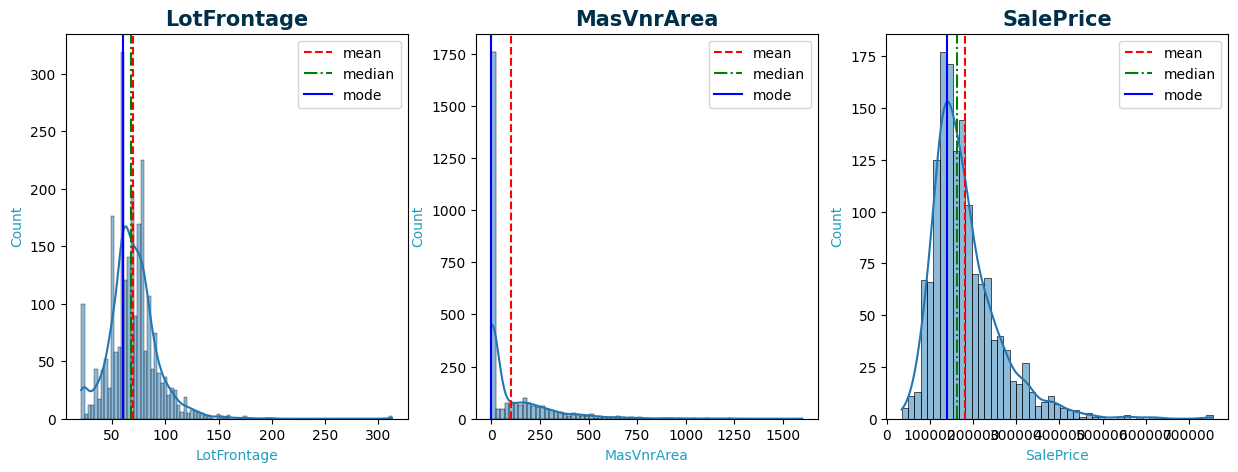

In [213]:
## plotting the graph for the numerical columns for further decision
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for index, col in enumerate(null_numerical_col):
    sns.histplot(df[col], kde=True, ax=ax[index])
    ax[index].axvline(df[col].mean(), color='r', linestyle ='--', label = 'mean')
    ax[index].axvline(df[col].median(), color='g', linestyle='-.', label = 'median')
    ax[index].axvline(df[col].mode()[0], color='b', linestyle='-', label = 'mode')
    ax[index].set_title(col)
    ax[index].legend()

By looking at the graph we can clearly see that <code>MasVnrArea</code>'s null value can be replaced with it's mode but for other we are not sure. So in this case we will take help of KNN imputer

In [214]:
## Using KNN imputer for filling null values
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 10)
knn_impute_val = knn.fit_transform(df[null_numerical_col])
knn_impute_df = pd.DataFrame(knn_impute_val, columns=null_numerical_col)

## replacing the values back to the original data
df[null_numerical_col] = knn_impute_df

Again plotting the same graph to see if changes can be seen

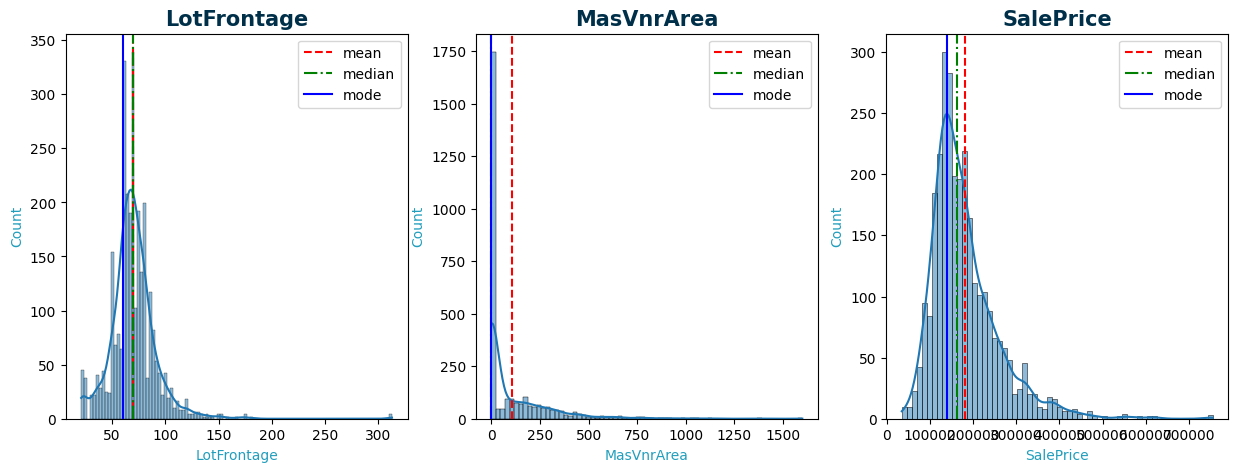

In [215]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for index, col in enumerate(null_numerical_col):
    sns.histplot(df[col], kde=True, ax=ax[index])
    ax[index].axvline(df[col].mean(), color='r', linestyle ='--', label = 'mean')
    ax[index].axvline(df[col].median(), color='g', linestyle='-.', label = 'median')
    ax[index].axvline(df[col].mode()[0], color='b', linestyle='-', label = 'mode')
    ax[index].set_title(col)
    ax[index].legend()

If u observe carefully then u can clearly see that LotFrontage Area is now more normally distributed

In [216]:
## Again checking Null contain columns
print(df.isnull().sum()[(df.isnull().sum() > 0)])

## Storing these columns in a variable
cat_null_col = df.isnull().sum()[(df.isnull().sum() > 0)].index.to_list()


Alley           2711
MasVnrType      1756
BsmtQual          77
BsmtCond          78
BsmtExposure      78
BsmtFinType1      75
BsmtFinType2      76
FireplaceQu     1413
PoolQC          2898
Fence           2339
MiscFeature     2804
dtype: int64


Now Let's deal with These columns. In Alley Column although there is 2711 null values but it does'nt means data is missed there and  we should drop this column. First Let's understand what Null values mean for this column. <br>
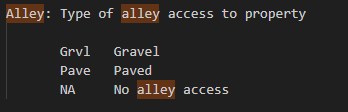<br>
If u check in description file then it's clear NaN mean No alley is there. <b style = 'color: #2a9d8f'>So NaN itself representing some information.</b><br><br>
Similiarly For <code>MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, PoolQC, Fence</code> and <code>MiscFeature</code> Null values present some information

In [217]:
## Creating a Transformer for dealing with the categorical column's null values

cat_null_trf = ColumnTransformer([
    ('AlleyImpute', SimpleImputer(strategy='constant', fill_value='No Alley'), ['Alley']),
    ('MasVnrTypeImpute', SimpleImputer(strategy='constant', fill_value='None'), ['MasVnrType']),
    ('BsmtQualImpute', SimpleImputer(strategy='constant', fill_value='No Basement'), ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']),
    ('FireplaceQuImpute', SimpleImputer(strategy='constant', fill_value='No Fireplace'), ['FireplaceQu']),
    ('PoolQCImpute', SimpleImputer(strategy='constant', fill_value='No Pool'), ['PoolQC']),
    ('FenceImpute', SimpleImputer(strategy='constant', fill_value='No Fence'), ['Fence']),
    ('MiscFeatureImpute', SimpleImputer(strategy='constant', fill_value='None'), ['MiscFeature'])
], remainder='passthrough')

## Transforming the data
cat_null_trf_val = cat_null_trf.fit_transform(df[cat_null_col])

## Creating the dataframe for further process
cat_null_trf_val_df = pd.DataFrame(cat_null_trf_val, columns= cat_null_col)

## fitting the values back to the original data
df[cat_null_col] = cat_null_trf_val_df

In [218]:
## making sure that all the null values are filled
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

<h2 style = 'color: #ffc300; text-align:center' ><b>EDA (Exploratory Data Analysis) & Feature Transformation</b></h2>

<li> Dealing With Numerical Columns First </li>

37


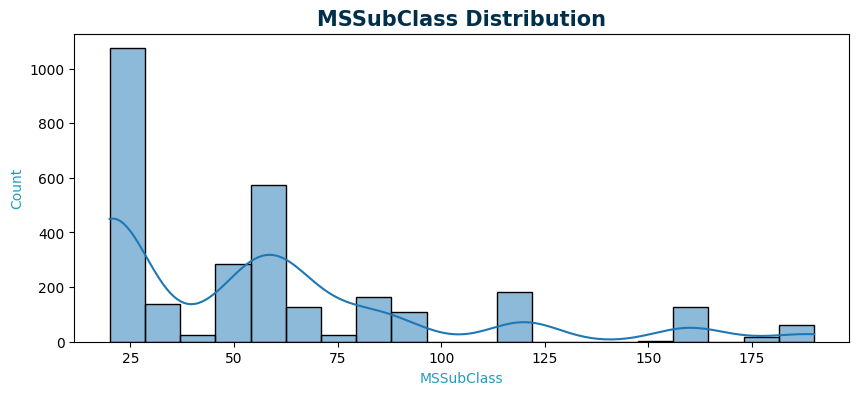

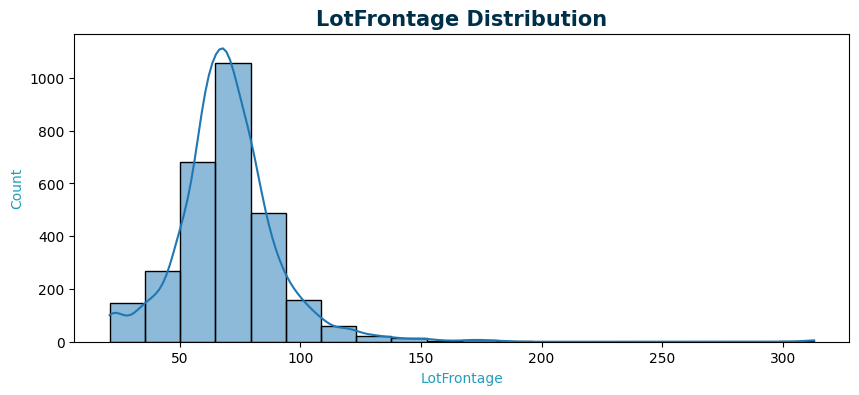

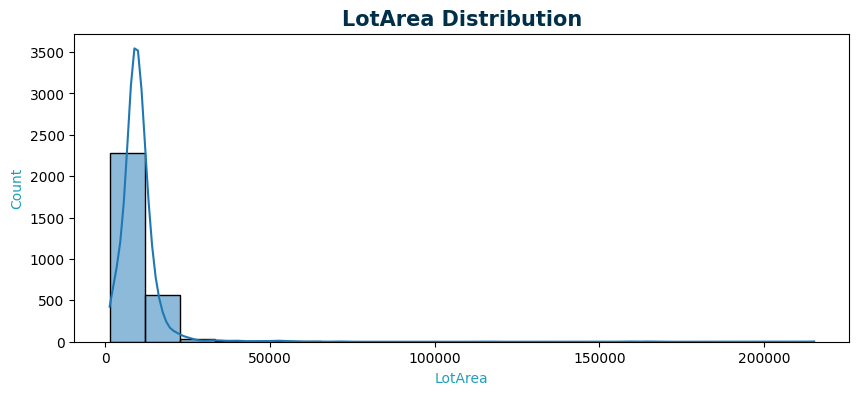

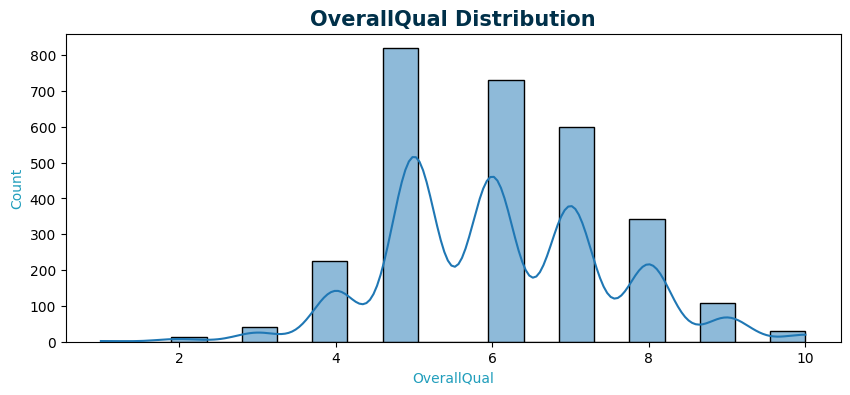

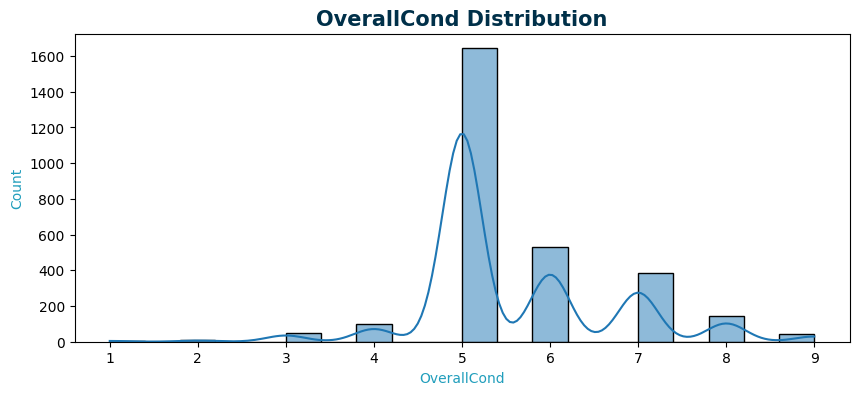

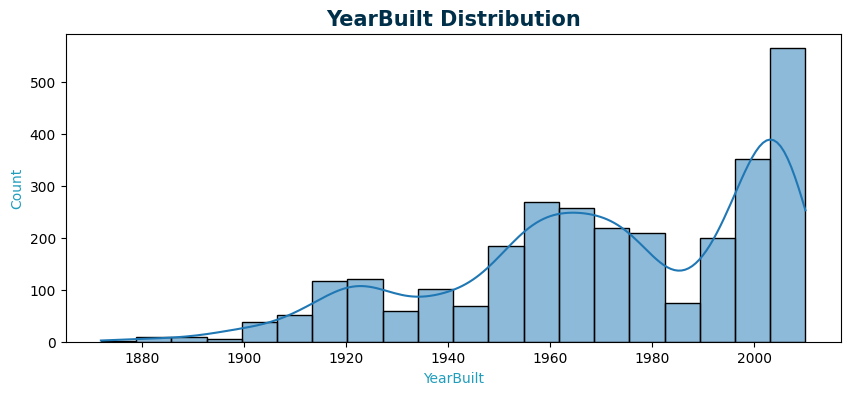

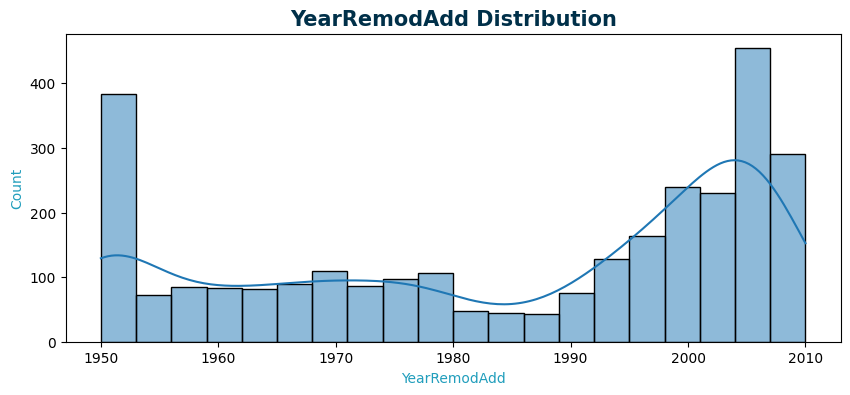

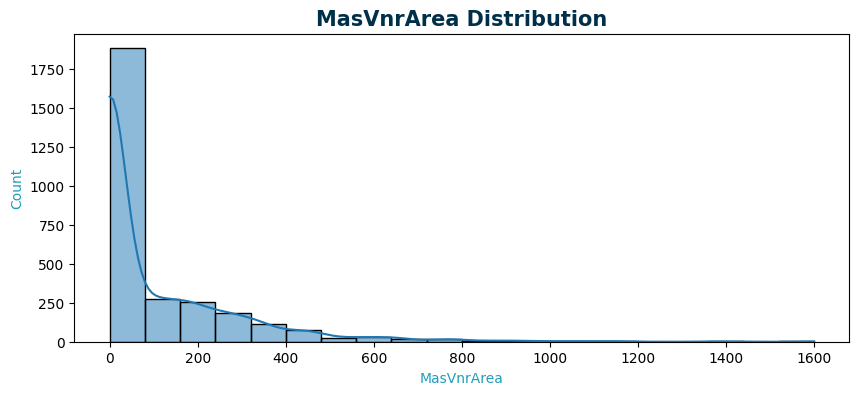

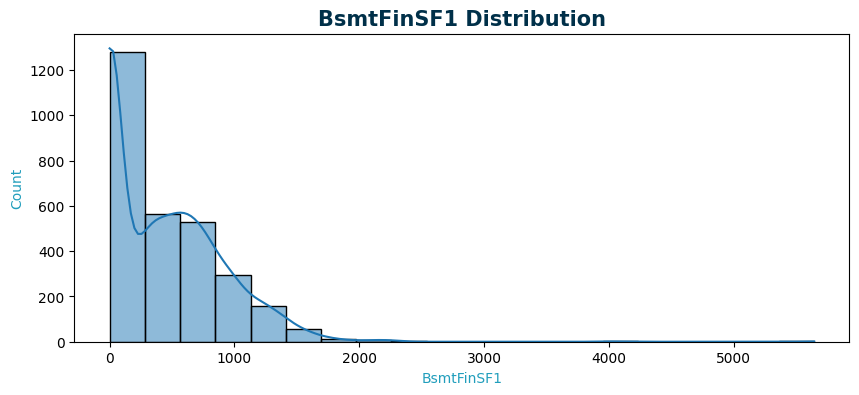

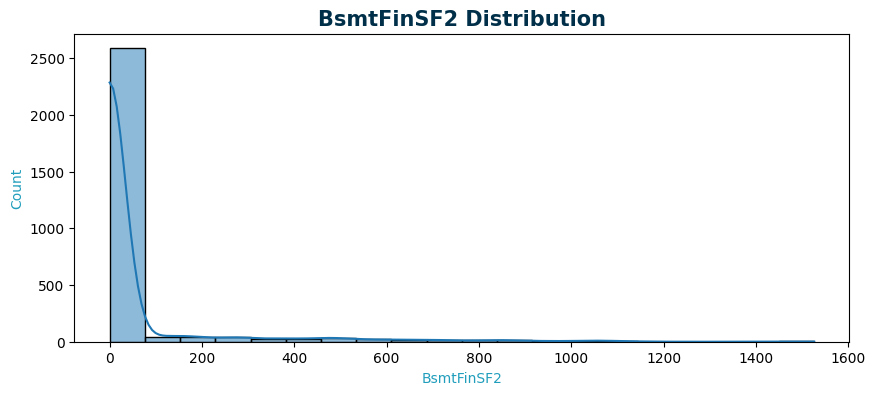

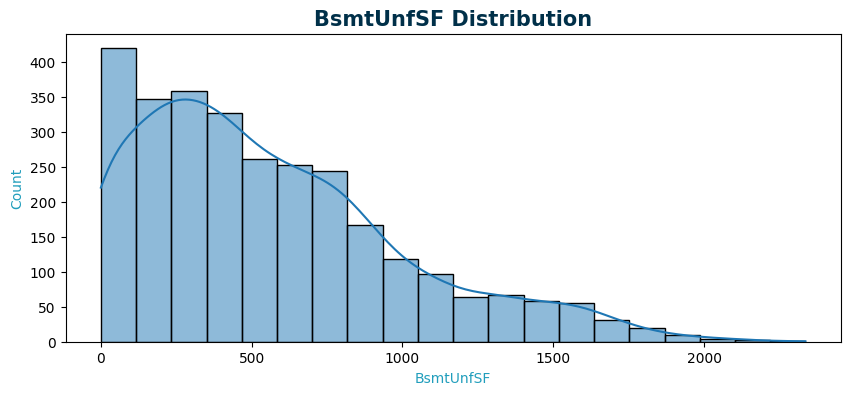

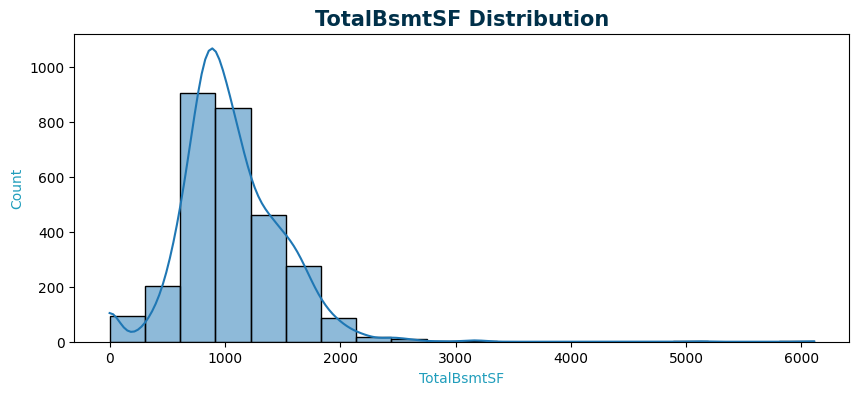

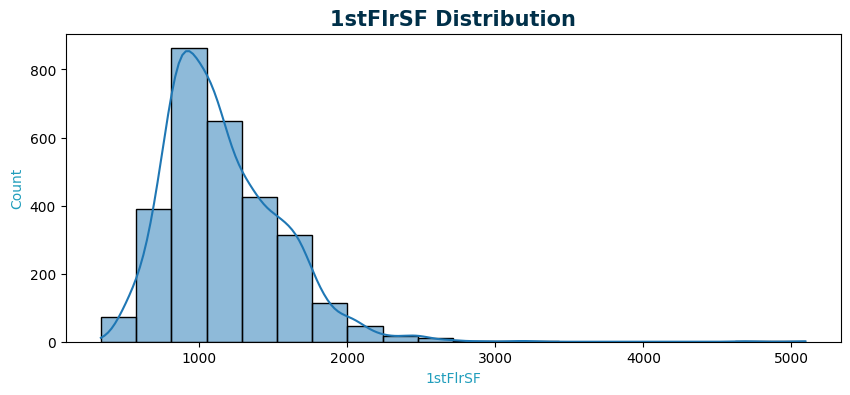

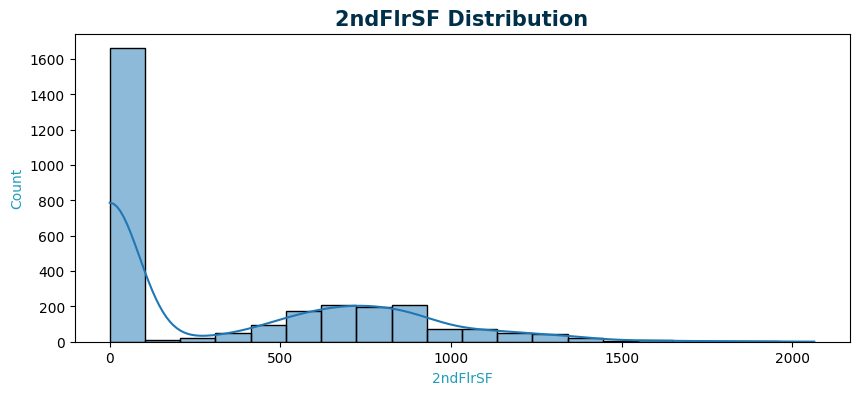

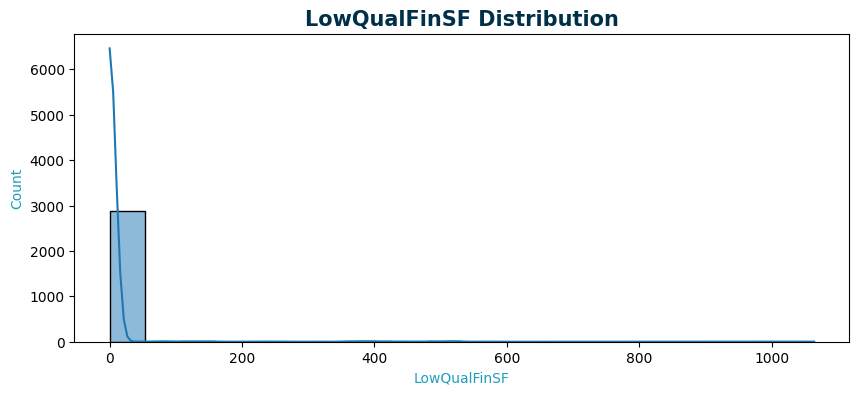

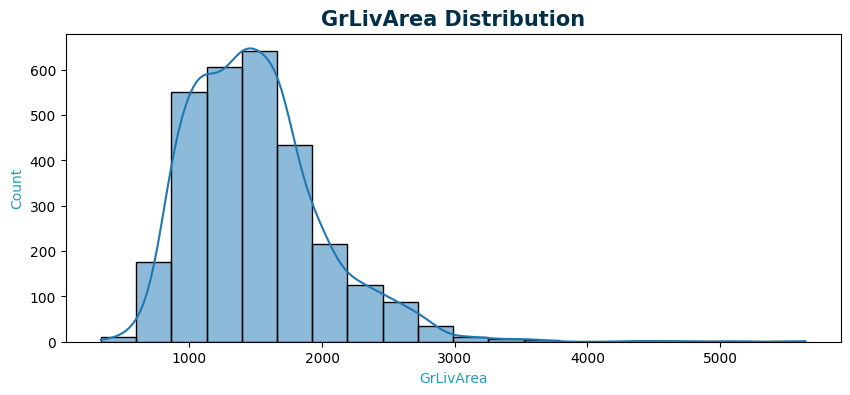

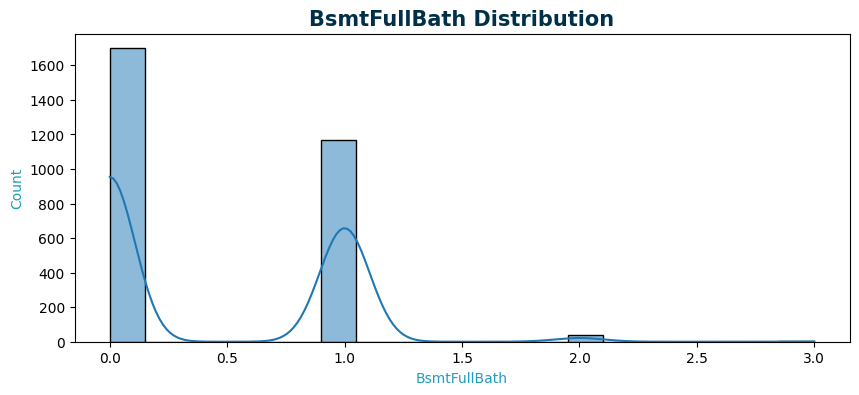

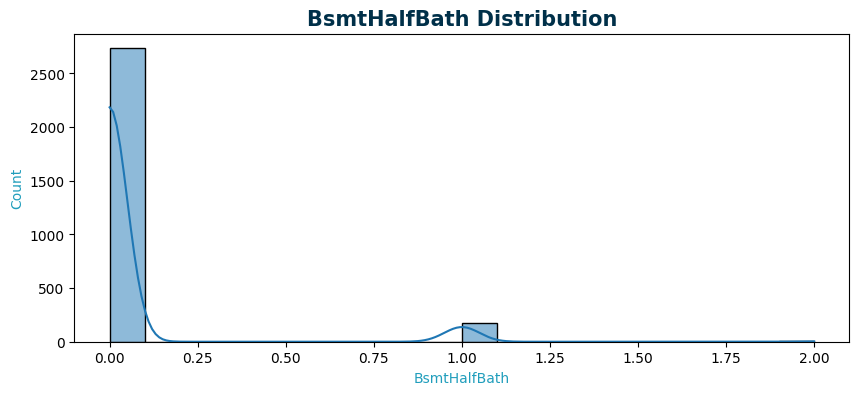

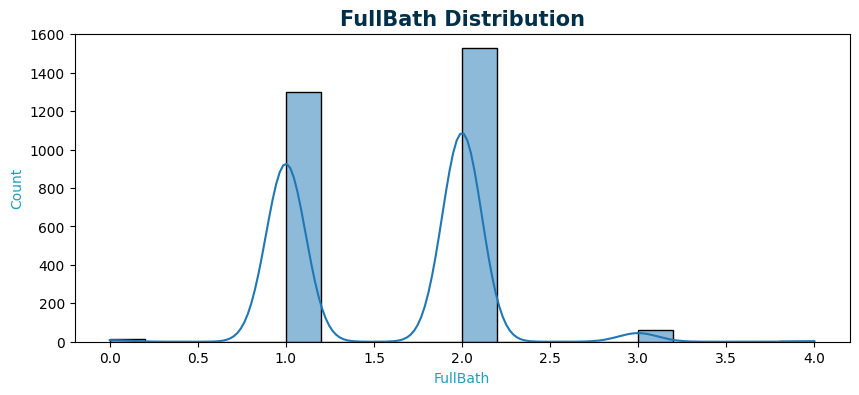

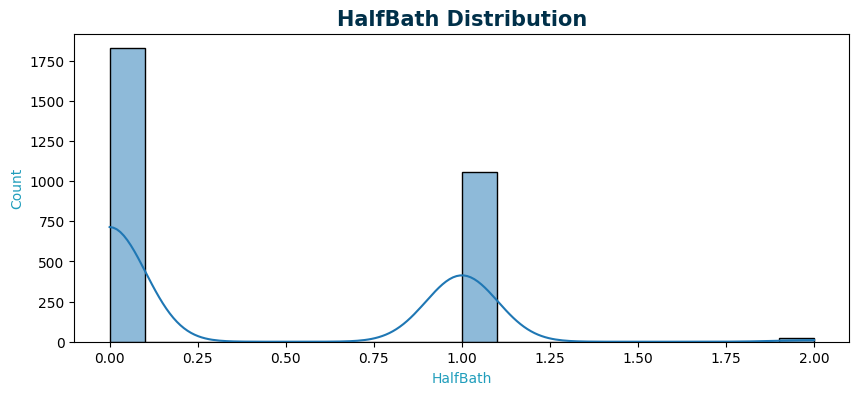

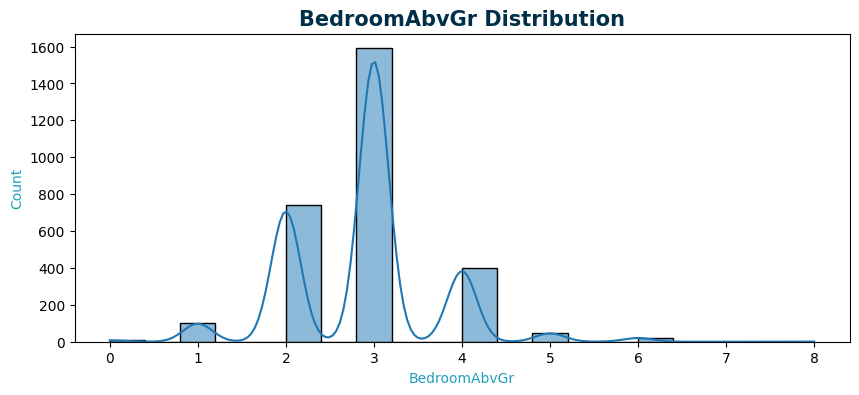

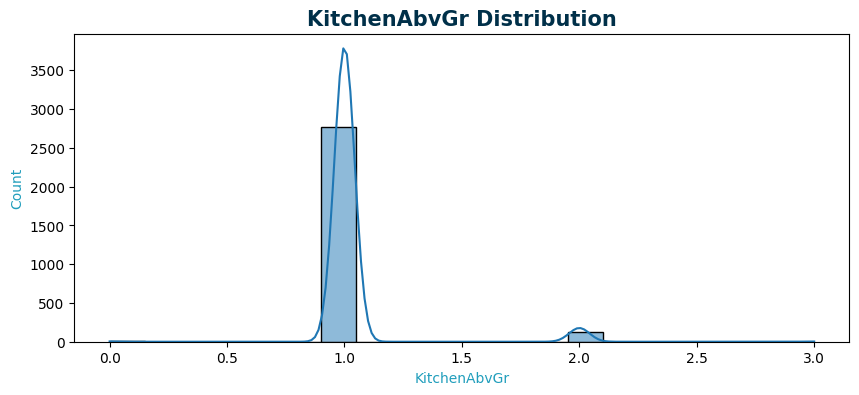

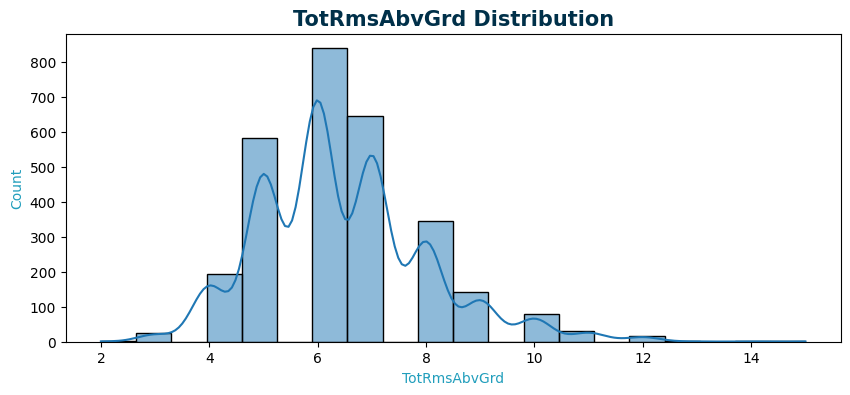

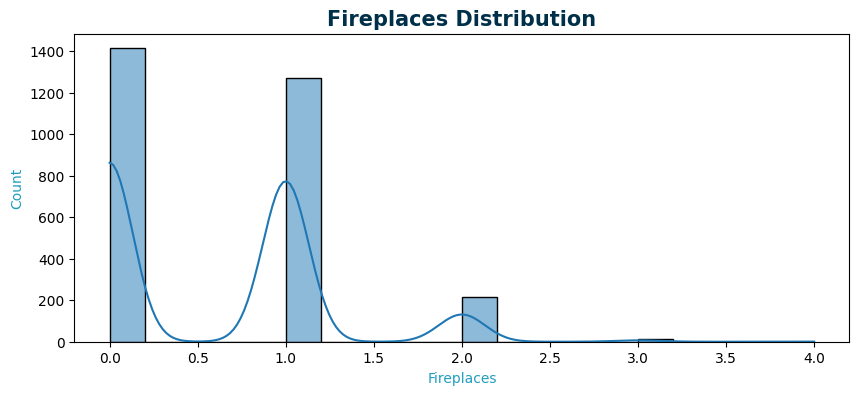

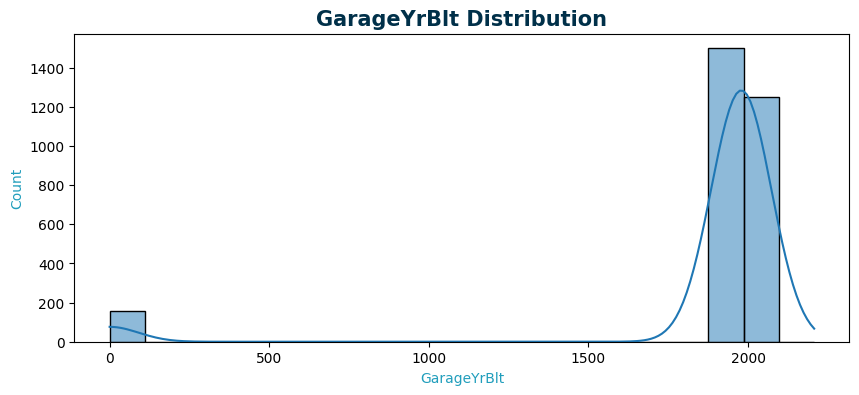

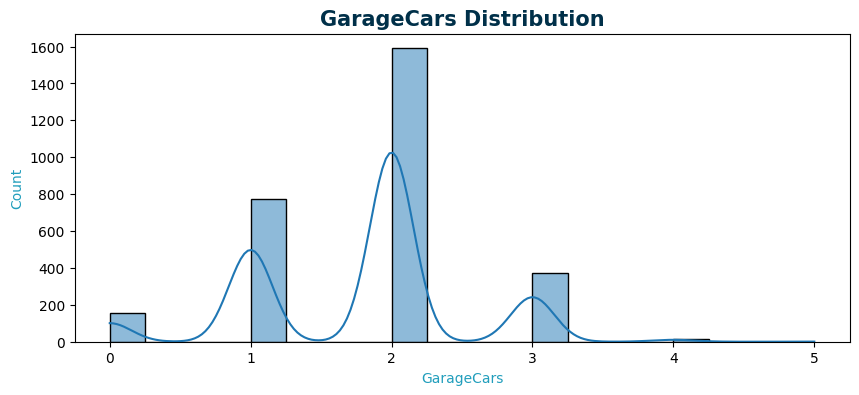

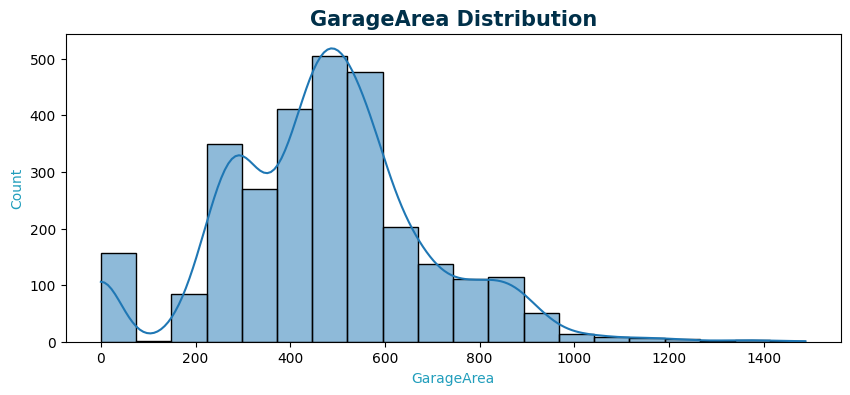

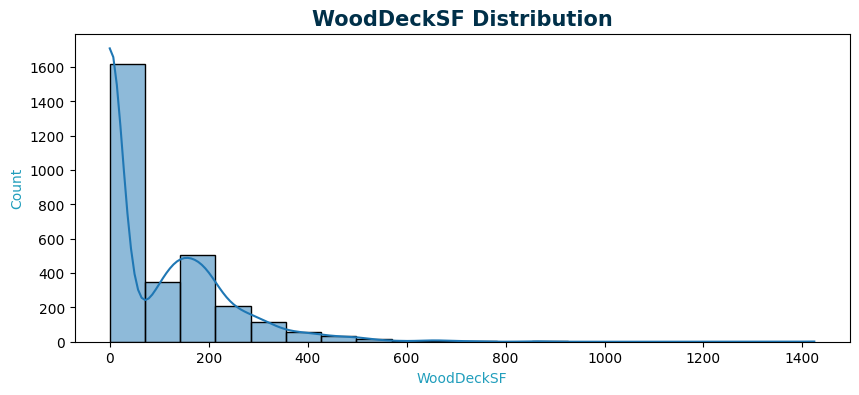

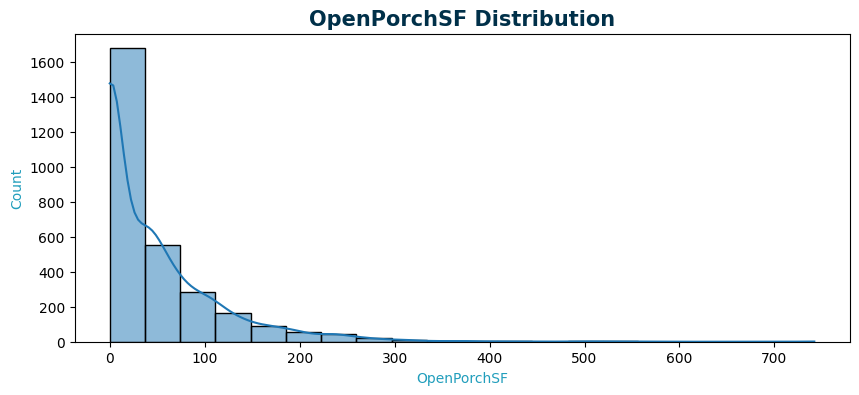

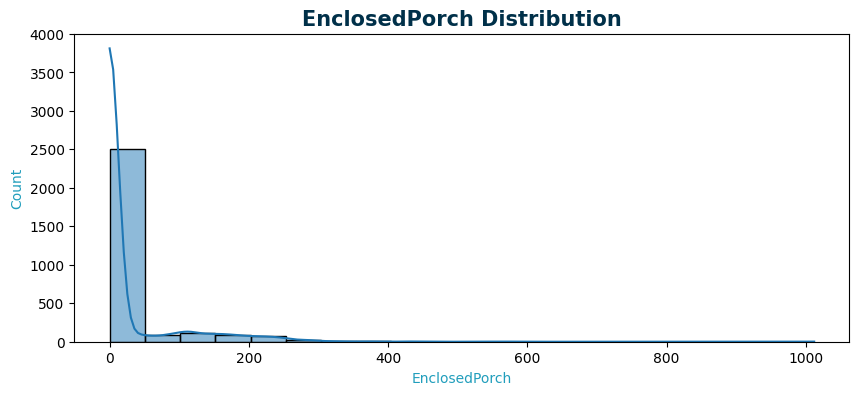

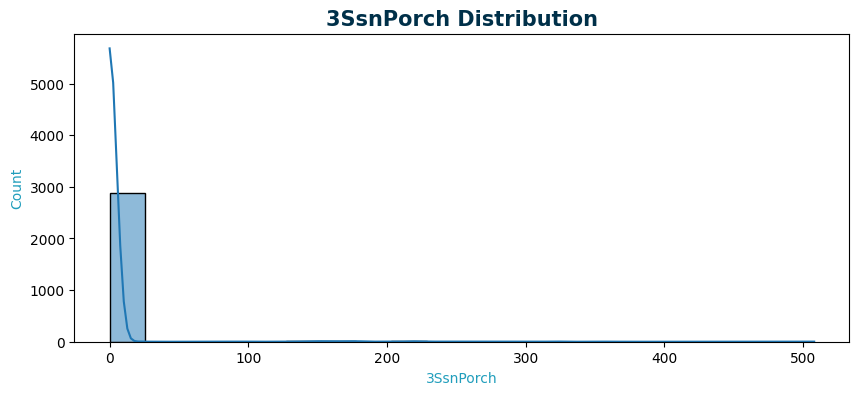

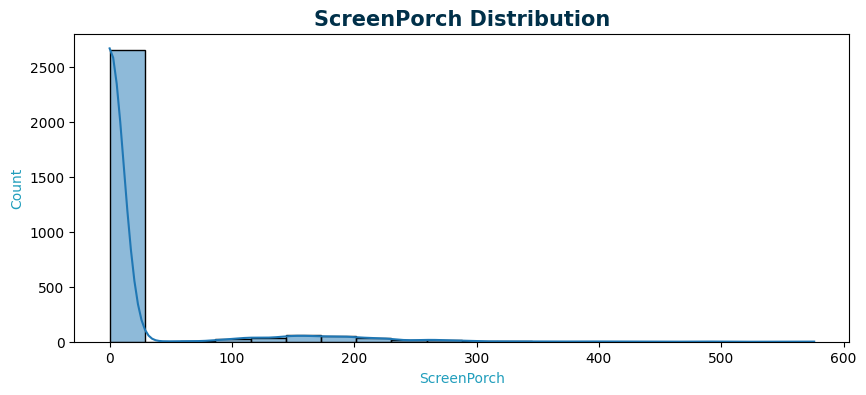

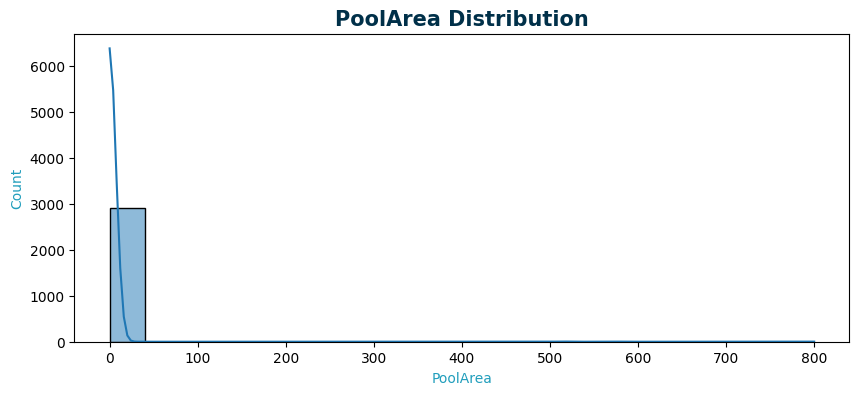

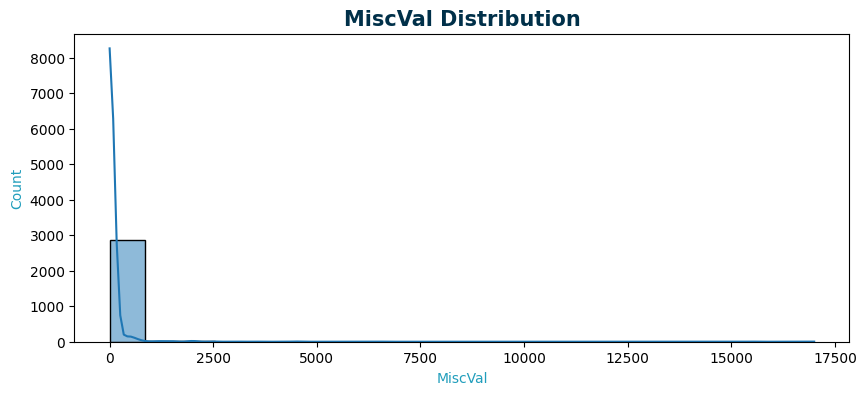

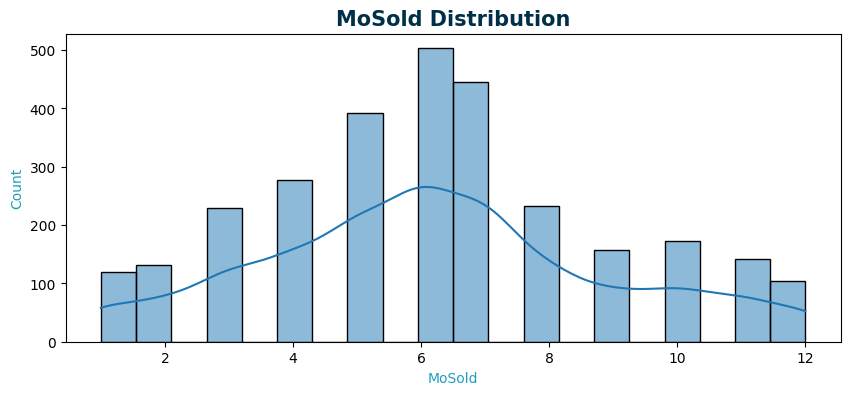

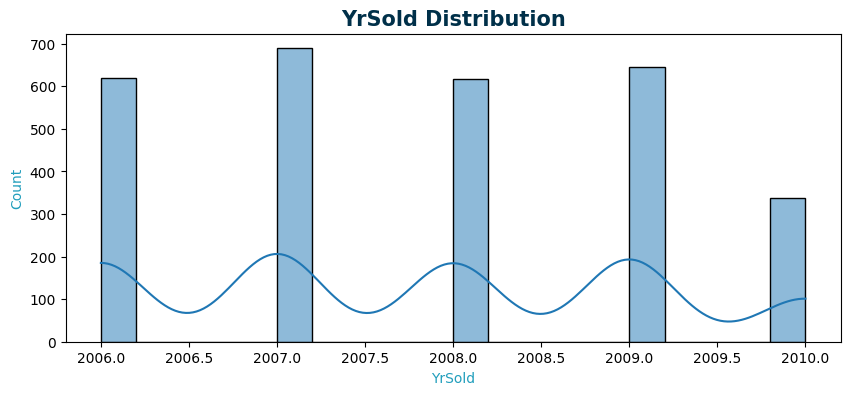

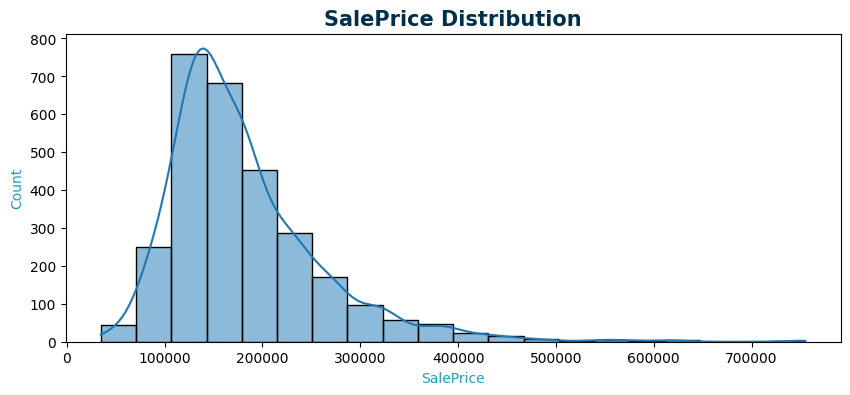

In [219]:
## Getting all the numerical columns
num_col = df.select_dtypes(exclude='object').columns.to_list()
print(len(num_col))

## code for distribution plot

for col in num_col:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=20, kde = True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.show()
   


<b style = 'color: yellow'>Problem Statment</b>

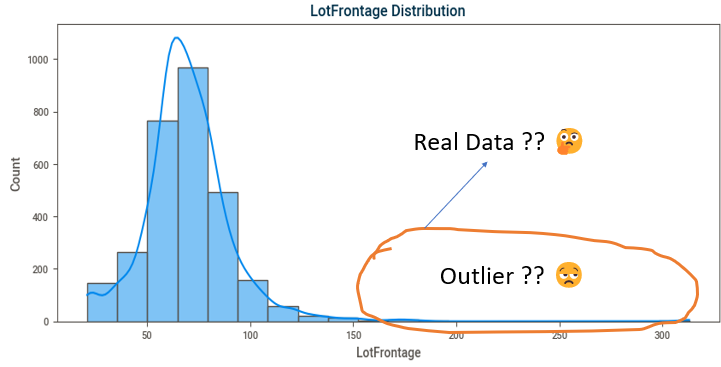
Is data where LotFrontage > 150 (or other columns that looks similiar) are outliers?? Or represent real data, they are not outliers?<br>
Let's find out

In [220]:
## checking mean value of sale price where LotFrontage is less than 150
less_than_150_Lot = df[df['LotFrontage'] < 150]['SalePrice'].mean()
print(f'Mean Sale Price where LotFrontage is less than 150: {less_than_150_Lot }')

greater_than_150_Lot = df[df['LotFrontage'] > 150]['SalePrice'].mean()
print(f'Mean Sale Price where LotFrontage is greater than 150: {greater_than_150_Lot }')

Mean Sale Price where LotFrontage is less than 150: 180075.38504155126
Mean Sale Price where LotFrontage is greater than 150: 281691.6666666667


From above data clearly we can see that larger the LotFrontage More it's price. Hence Data is real it's not an outlier.<br>
<b style = 'color: green'>Same for other i checked it does'nt seem they are outlier</b><br>
Hence according to me this should be done : <br>
<li>LotAreaDistribution -> Right Schwed (Log Transformation applicable)</li>
<li>MasVnrArea -> Right Schwed (Log transformation applicable)</li>
<li>BsmtFinSF1 -> Right Schwed (Log Transformation applicable)</li>
<li>BsmtFinSF2 -> Right Schwed (Log Transformation applicable)</li>
<li>BsmtUnfSf -> Log Transformation may be good for model (will check without transforming too)</li>
<li>TotalBsmtSf -> Log Transformation may be good for model (will check without transforming too)</li>
<li>1stFlrSF -> Log Transformation may be good for model (will check without transforming too)</li>
<li>2ndFlrSF -> Log Transformation may be good for model (will check without transforming too)</li>
<li>LowQualFinSF -> Right Schwed (Log Transformation applicable)</li>
<li>GrLivAreaDistribution -> Log Transformation may be good for model (will check without transforming too)</li>
<li>GarageArea -> Log Transformation may be good for model (will check without transforming too)</li>
<li>WoodDeckSf -> Right Sckwed (Log Transformation applicable)</li>
<li>OpenPorchSf -> Right Sckwed (Log Transformation applicable)</li>
<li>EnclosedPorch -> RightScwed (Log Transformation applicable)</li>
<li>3SsnPorch -> Rightscwed (Log Transformation applicable)</li>
<li>ScreenPorch -> Rightschwed (Log Transformation applicable)</li>
<li>PoolArea -> Log Transformation Applicable</li>
<li>MisValDistribution -> Log Transformation Applicable</li>

In [221]:
## importing function transformer
from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(np.log1p)
## getting the columns that should be log transformed
log_col = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch', 'PoolArea',"MiscVal", "LotArea"]

## creating transformer for log transformation
log_tf = ColumnTransformer([('logtranform', log_transform, log_col)], remainder = 'passthrough')

## transforming the data
log_tf_val = log_tf.fit_transform(df[log_col])

# tranforming data into dataframe for replacing
log_tf_df = pd.DataFrame(log_tf_val, columns = log_col)
log_tf_df[log_col]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotArea
0,4.189655,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,9.042040
1,4.394449,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.169623
2,4.234107,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9.328212
3,4.110874,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,9.164401
4,4.442651,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,9.565284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,4.143135,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.568896
2904,4.454347,4.787492,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,0.0,6.996681,5.659482,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000,7.546974
2905,4.204693,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,0.0,7.110696,6.357842,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.903538
2906,4.234107,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,0.0,6.878326,0.000000,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508,9.253591


Now again checking their distributions

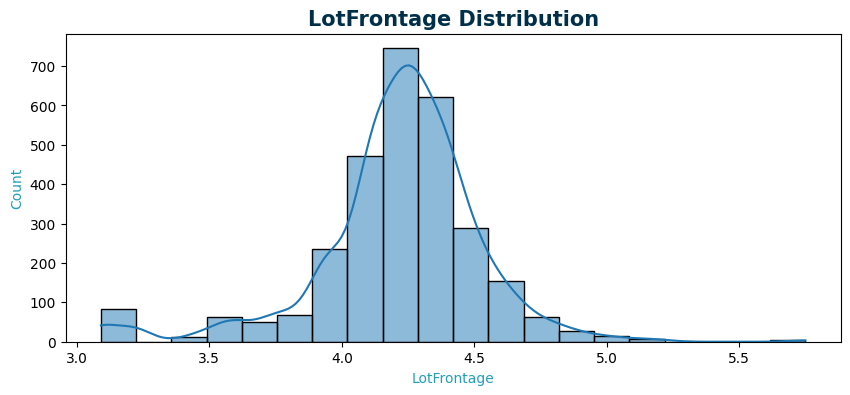

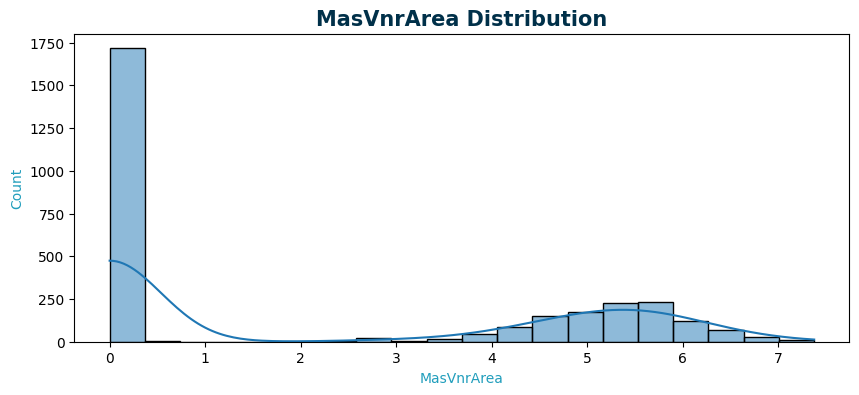

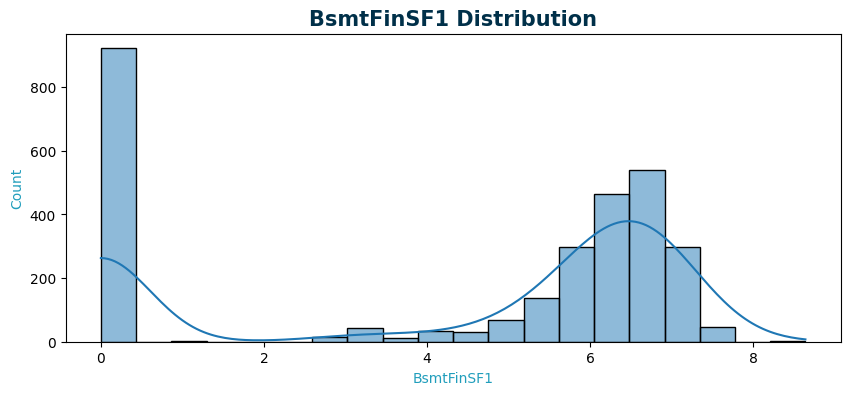

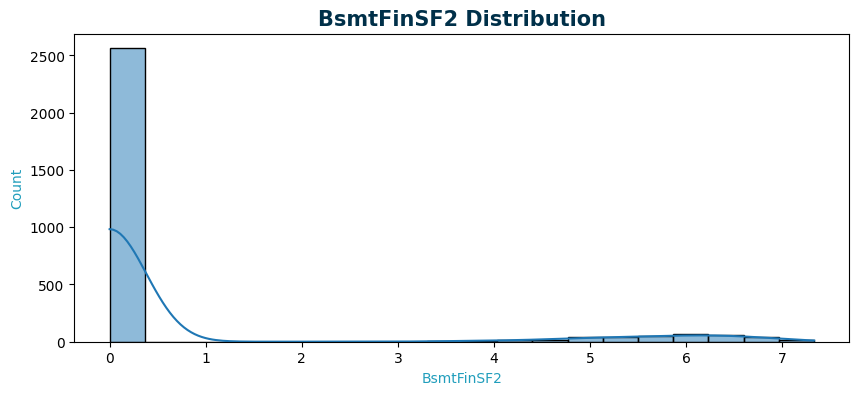

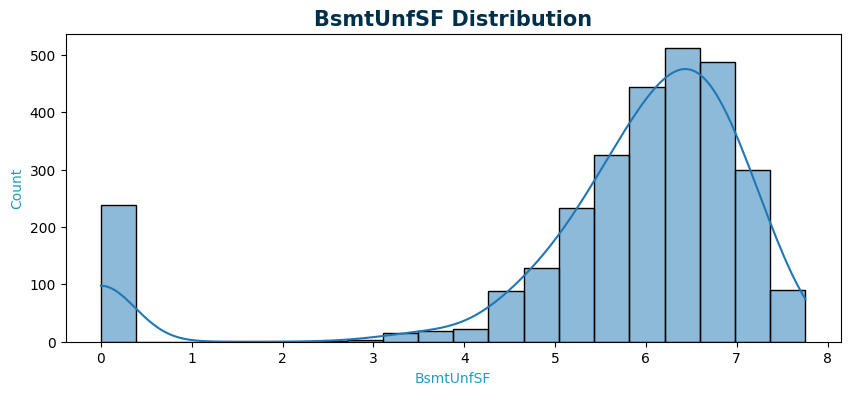

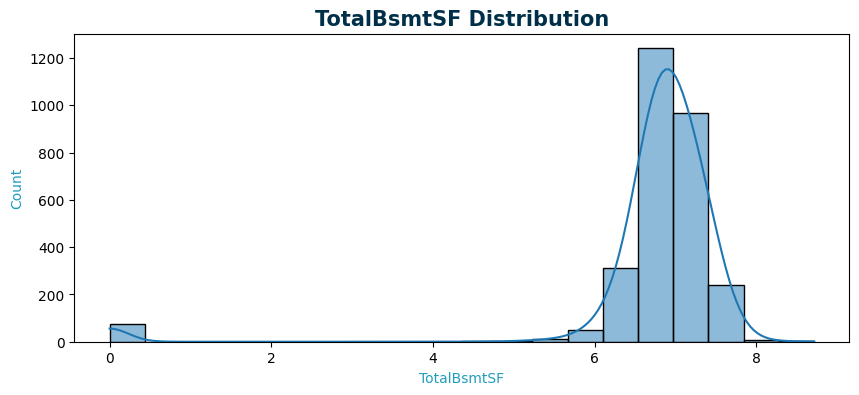

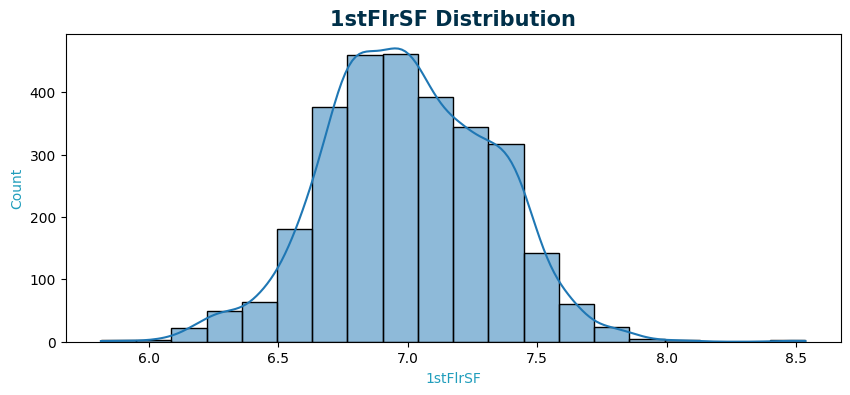

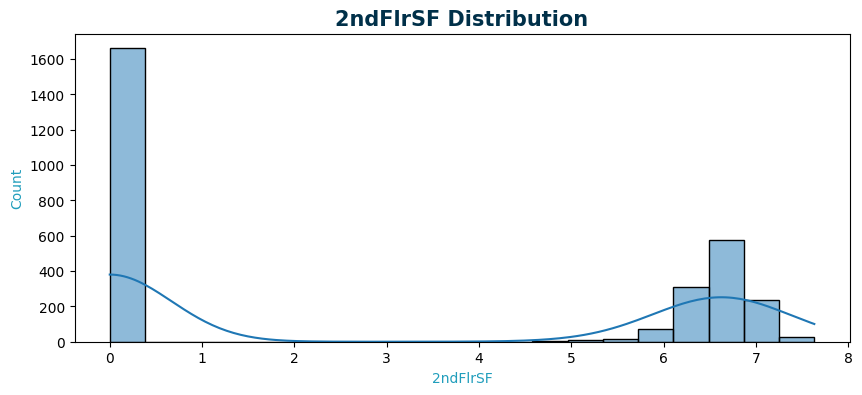

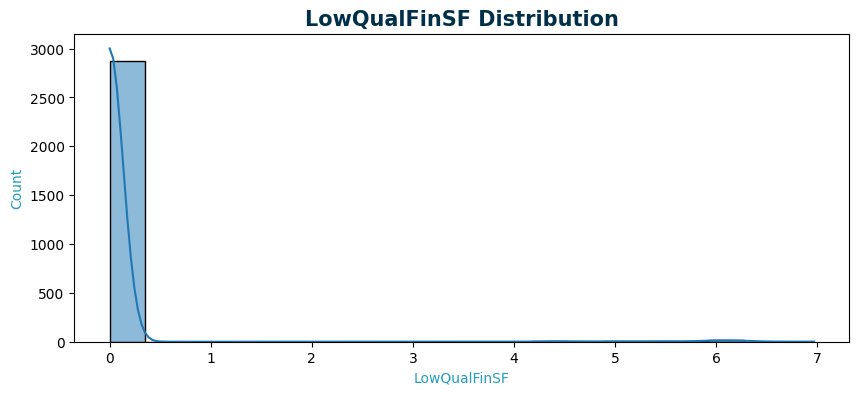

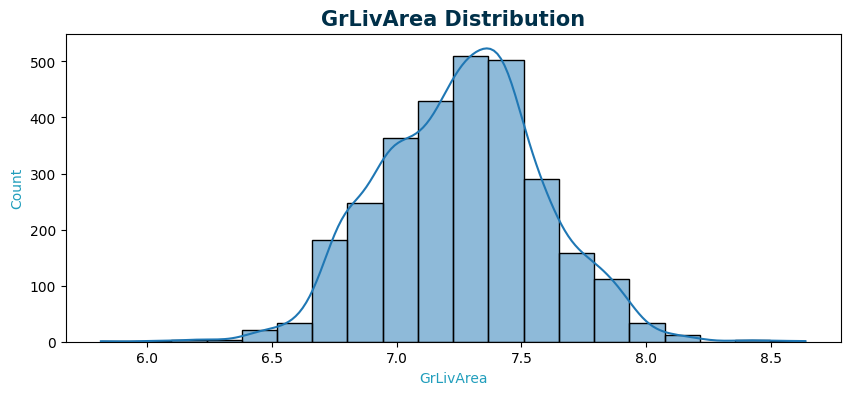

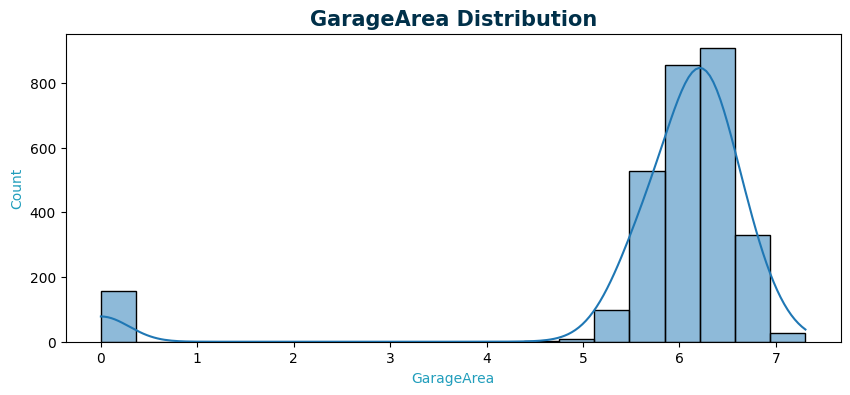

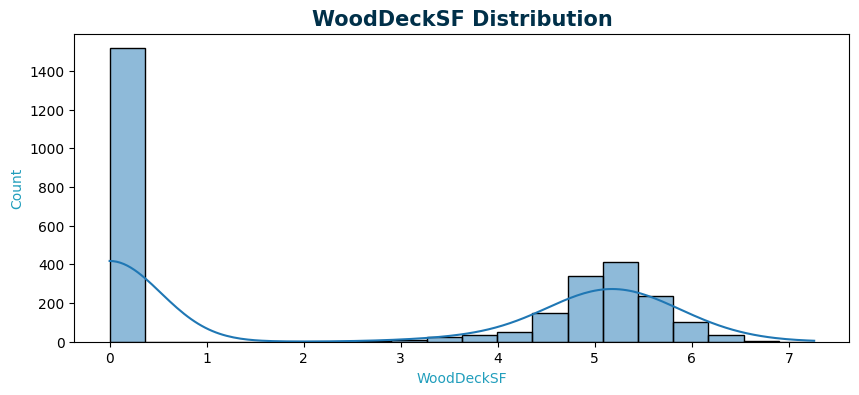

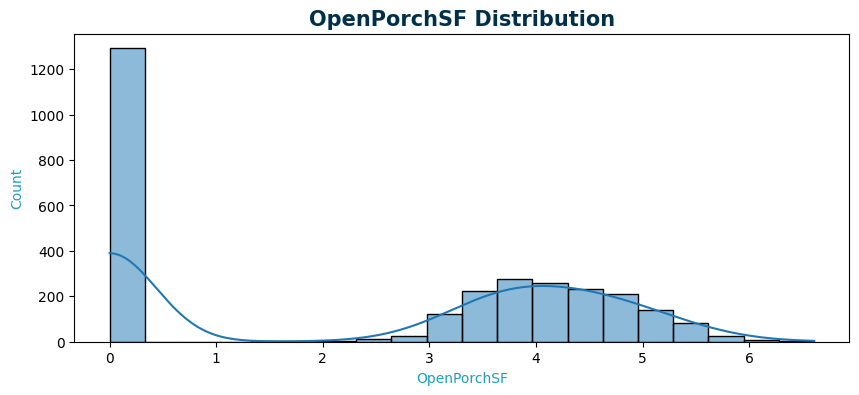

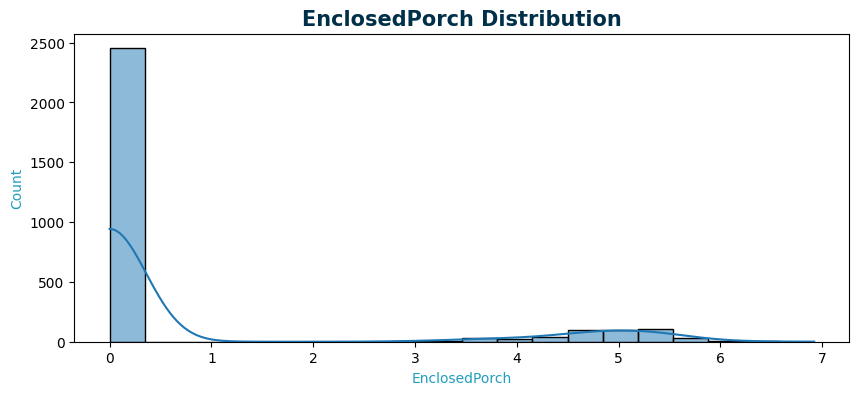

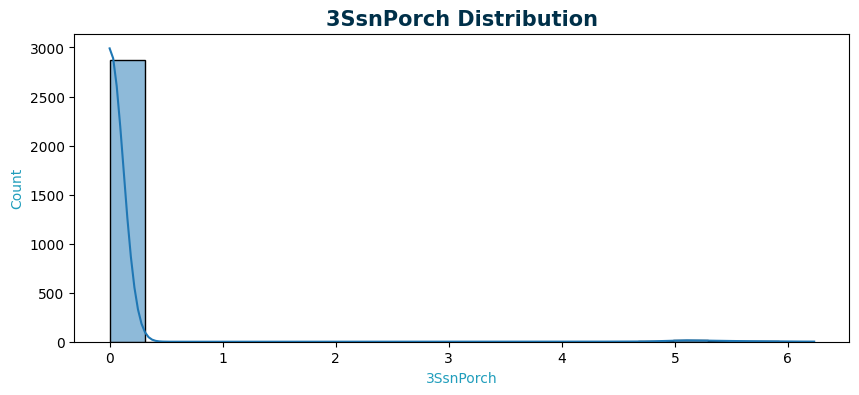

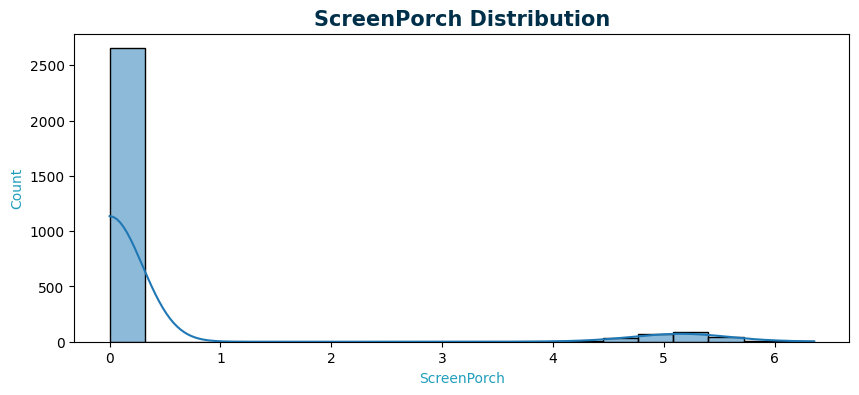

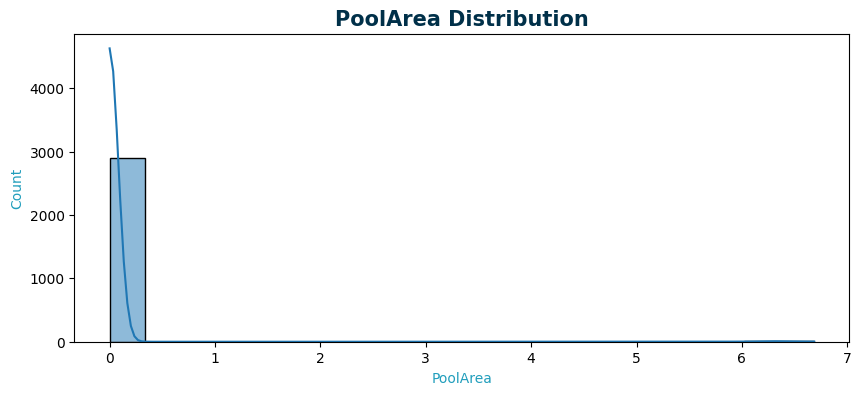

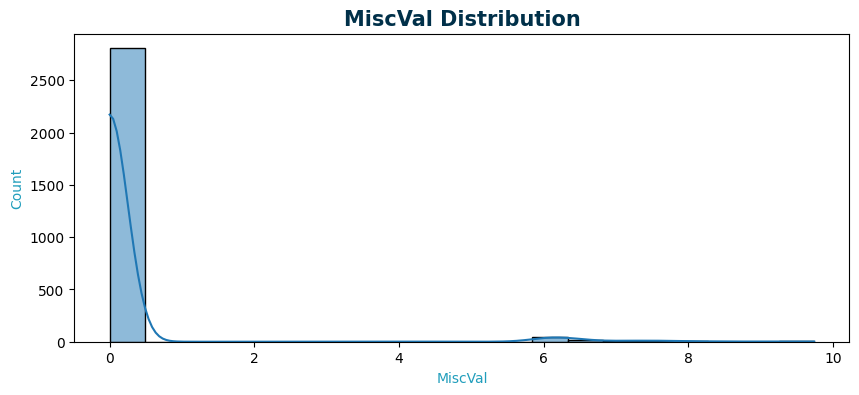

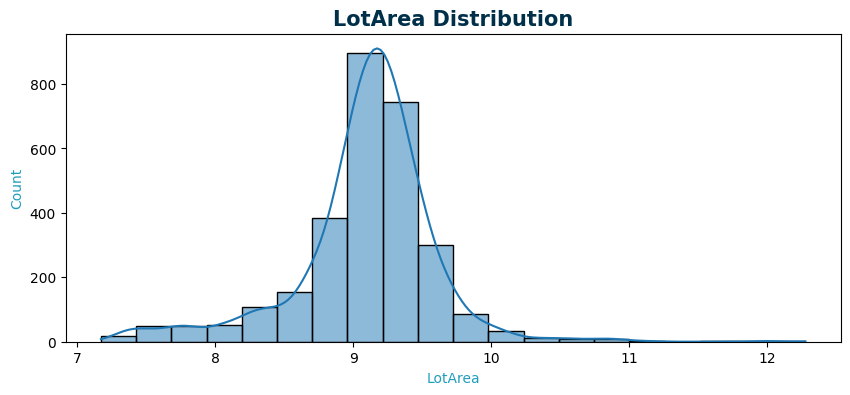

In [222]:
## Plotting histogram to see new distribution
for col in log_col:
    plt.figure(figsize=(10, 4))
    sns.histplot(log_tf_df[col], bins=20, kde = True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.show()
   

Now the range of these data are very reduced that should make my model performance little better.

In [223]:
## Getting List of rest columns
rest_cols = [i for i in num_col if i not in log_col]
rest_cols.remove('SalePrice') ## Since this is Target Col
print(rest_cols)

['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']


<code>MSSubClass, OverallQual, OverallCond, </code> data looks like numerical but actually if u look in description file its actually representing categorical data that's why better i will change it as str Datatype to avoid any confusion later.

In [224]:
## changing data type to string
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('str')

In [225]:
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

<b>Now dealing with Date type features</b><code>YearBuilt, YearRemodAdd, MosSold, YrSold</code> 

<li>Here year built is not an good looking feature for except i will create another featuer using this as <code>HouseAge</code> that will make more sense to data and same for YearRemodAdd will create <code>RemodeledAge</code> feature.</li><br>
<li>Will create a new feature as SoldDate with the MosSold and YrSold</li>

In [226]:
# creating New Feature HouseAge and removing yearBuilt
from datetime import datetime as dt
df['HouseAge'] = dt.now().year - df['YearBuilt']  ## creating HouseAge

##Creating New Feature RemodelAge
df['RemodelAge'] = dt.now().year - df['YearRemodAdd']

## creating New Feature SoldDate
df['dateSold'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str))

## removing other columns
df.drop(['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'], axis = 1, inplace= True)

Just having a look on rest num cols to decide if something need to be change ??

In [ ]:
df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars']]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars
0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0
1,0.0,1.0,2,0,3,1,6,1,1976.0,2.0
2,1.0,0.0,2,1,3,1,6,1,2001.0,2.0
3,1.0,0.0,1,0,3,1,7,1,1998.0,3.0
4,1.0,0.0,2,1,4,1,9,1,2000.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,1,1,3,1,5,0,0.0,0.0
1455,0.0,0.0,1,1,3,1,6,0,1970.0,1.0
1456,1.0,0.0,1,0,4,1,7,1,1960.0,2.0
1457,0.0,1.0,1,0,3,1,6,0,0.0,0.0


Ok Nothing need to be change now (GarageYrBuilt or GarageCars) i will deal with them later since i have other plan for them (not again create GarageAge that's gimmy feature)

<li>Dealing With Cat Cols</li>